<a href="https://colab.research.google.com/github/rafael100495/Aulas_Mackenzie/blob/main/Trabalho_Arnaldo_Jabor_Rafael_Alves_dos_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import json

O Texto escolhido foi o json do arnaldo jabor. 
Abaixo, exibi o head para confirmar se o arquivo estava vindo normalmente.

In [ ]:
df = pd.read_json(f"https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/arnaldo_jabor.json")
df.head(10)

,author,title,content
0,Arnaldo Jabor,Rio e terror,Venho por esta colocar minha colher na sopa de...
1,Arnaldo Jabor,Minha avó,Tudo já foi escrito sobre essa crise óbvia e v...
2,Arnaldo Jabor,O juízo final,"Queridos leitores, hoje o mundo pode acabar. N..."
3,Arnaldo Jabor,Adeus,"Caros leitores, meus semelhantes e irmãos, vou..."
4,Arnaldo Jabor,A besta do Apocalipse,Eu só penso no Trump. Nunca senti tanta repuls...
5,Arnaldo Jabor,Os Brasis,"“Graças a Deus, eu sou da classe dominante. Eu..."
6,Arnaldo Jabor,O que mudou?,Ao analisar o panorama cultural da mais longa ...
7,Arnaldo Jabor,A volta da caretice,"Fala-se muito em esquerda e direita, mas nos e..."
8,Arnaldo Jabor,O homem-bomba americano,"Quando o Trump foi eleito, fiquei doente. Juro..."
9,Arnaldo Jabor,Meu último desejo,"Sim, senhores, eu vou contar tudo que acontece..."


Fiz uma cópia do Data Frame para apenas a coluna content, que é onde possui os textos.

In [ ]:
content = df[['content']].copy()
content.head(10)

,content
0,Venho por esta colocar minha colher na sopa de...
1,Tudo já foi escrito sobre essa crise óbvia e v...
2,"Queridos leitores, hoje o mundo pode acabar. N..."
3,"Caros leitores, meus semelhantes e irmãos, vou..."
4,Eu só penso no Trump. Nunca senti tanta repuls...
5,"“Graças a Deus, eu sou da classe dominante. Eu..."
6,Ao analisar o panorama cultural da mais longa ...
7,"Fala-se muito em esquerda e direita, mas nos e..."
8,"Quando o Trump foi eleito, fiquei doente. Juro..."
9,"Sim, senhores, eu vou contar tudo que acontece..."


Criei uma sopa de palavras apenas para visualizar como estava cada alteração.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

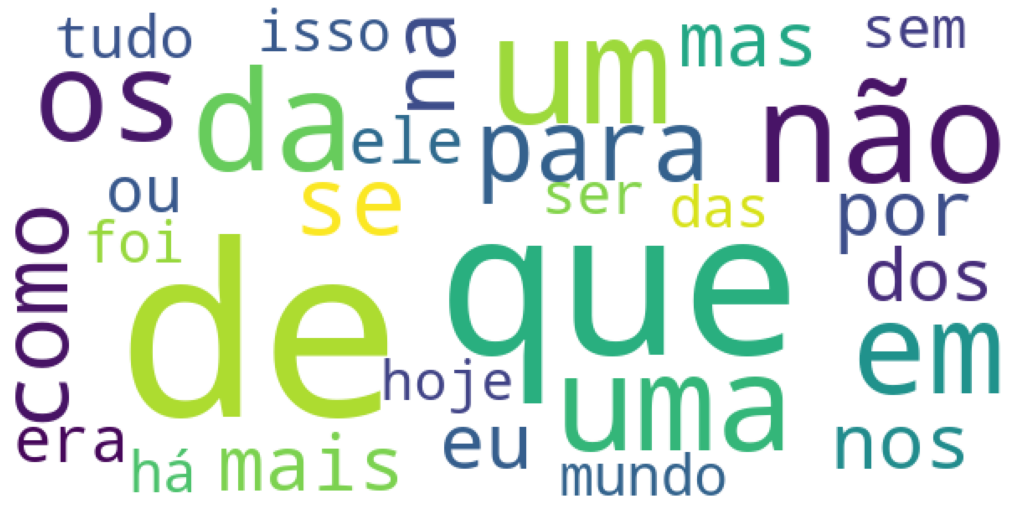

In [ ]:
original_text = ' '.join(content['content'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(original_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = 'White') 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

Importei conforme os exemplos os códigos para padronizar as palavras.

In [ ]:
import unicodedata

def singularizar(PalavraOriginal):
    """ Remove acentos e deixa tudo minuscula"""
    palavra = PalavraOriginal.lower()

    # for wd in INVARIAVEL:
    #     if transliterate(wd).lower() == palavra:
    #         return palavra

    """      Lista de regras, composto em tuplas de valor a ser buscado e regra de substituição    """
    rules = []

    """    Palavras terminadas em ns    """
    rules.append((r"^([a-zA-z]*)ns$", r"\1m"))

    """ Palavras terminas em r ou z luzes - luz, flores - flor, arrozes - arroz"""
    rules.append((r"^([a-zA-z]*)res$", r"\1r"))
    rules.append((r"^([a-zA-z]*)zes$", r"\1z"))
    rules.append((r"^([a-zA-z]*)ses$", r"\1s"))

    """    Palavras terminadas em ão    """
    rules.append((r"^([a-zA-z]*)oes$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aos$", r"\1ao"))
    rules.append((r"^([a-zA-z]*)aes$", r"\1ao"))

    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|o|u)is$", r"\1\2l"))

    """ Palavras terminas em il  cantis - cantil """
    rules.append((r"^([a-zA-z]*)is$", r"\1il"))

    """ Palavras terminas em les  mal - males, mel - meles """
    rules.append((r"^([a-zA-z]*)les$", r"\1l"))


    """ Palavras regulares, casos simples: carros, arvores, aboboras"""
    rules.append((r"^([a-zA-z]*)(a|e|i|o|u)s$", r"\1\2"))
    
    for rule in rules:
        if re.match(rule[0], palavra) is not None:
            return re.sub(rule[0], rule[1], palavra, 1, re.IGNORECASE)
    return palavra

In [ ]:
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
import string

#Download das palavras de parada em português
nltk.download('stopwords')
stop = stopwords.words('portuguese')

#Transforma em minuscula e remoção de acentos 
content['normalized'] = content['content'].str.lower().apply(lambda x: unidecode(x))
content['normalized'] = content['normalized'].apply(lambda x: unidecode(x))

# remocação de pontuaçao
content['normalized'] = content['normalized'].str.replace('[{}]'.format(string.punctuation), '')

# remocação de numeros
content['normalized'] = content['normalized'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada
content['normalized'] = content['normalized'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))

# Removendo plural
content['normalized'] = content['normalized'].apply(lambda x: ' '.join([singularizar(word) for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


Testei para visualizar como estava saindo o normalized, e aparentemente, está tudo ok!

In [ ]:
content['normalized']

0      venho colocar colher sopa bode preto rio virou...
1      tudo ja escrito sobre crise obvia vagabunda ro...
2      querido leitor hoje mundo pode acabar duro hoj...
3      caro leitor semelhante irmao vou abandonalo co...
4      so penso trump nunca senti tanta repulsa algue...
                             ...                        
439    espectro ronda mundo atual caretice falase esq...
440    ha grande amor brasileiro fracasso acontece al...
441    impressioneime ha pouco polemica ilustrativa p...
442    hoje vou falar filosofo nao fujam sao lucrecio...
443    vivendo suspense historico situacao tragico co...
Name: normalized, Length: 444, dtype: object

Criei uma nova nuvem de palavras, para visualizar como ficou depois de normalizar, porém, notei muitas palavras que poderiam ser removidas.

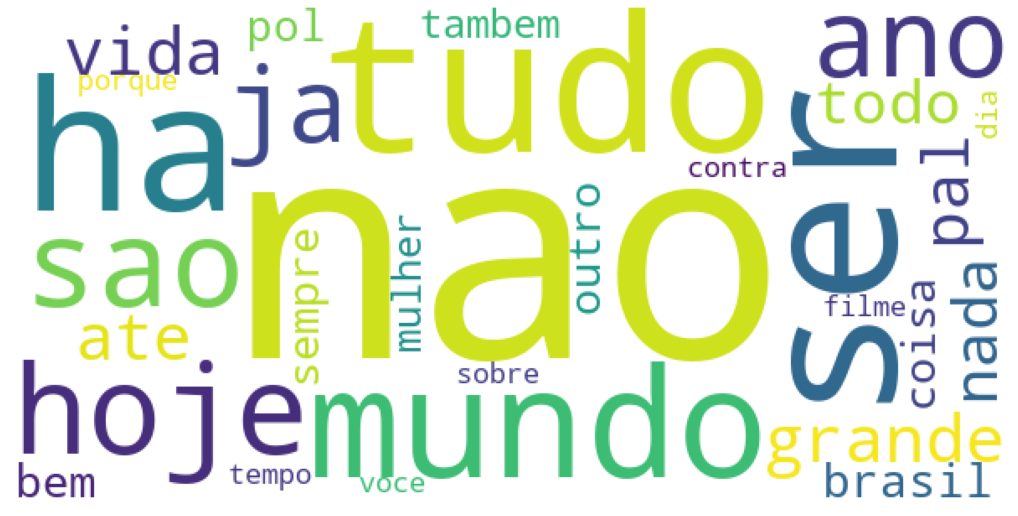

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# from nltk.tokenize import word_tokenize

treated_text = ' '.join(content['normalized'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(treated_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

Inseri algumas palavras que percebi que estavam sendo repetidas, inclusive algumas vertentes do na e do né.

In [ ]:
ignorewords = [ 'nao', 'sao', 'ser', 'voce', 'tambem', 'sobre', 'ha', 'ja', 'tudo', 'hoje', 'ano', 'pol', 'onde','grande','pal','ate','todo','ai', 'pode', 'porque', 'agora', 'vez', 'homem', 'sempre', 'vai', 'ninguem', 'nunca', 'nada', 'mulher', 'sim', 'dia', 'fim', 'coisa', 'contra', 'norte', 'cara', 'toda', 'deu', 'novo', 'bem', 'ainda', 'outro', 'verdade', 'ver', 'mal', 'diante', 'ali', 'ainda', 'assim', 'bom', 'dentro', 'nova', 'olho', 'sera', 'apena', 'vi', 'na', 'tao', 'meio', 'estao', 'la', 'talvez', 'disse', 'mao', 'fazer', 'povo', 'claro', 'na', 'fazer', 'alem', 'rua', 'havia', 'ter', 'ideia', 'ante', 'mim', 'ne', ' ne', 'ne ', 'né', ' na', ' na', 'na', 'gente' ]

content['normalized'] = content['normalized'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (ignorewords)]))
content['normalized'] = content['normalized']

Plotei mais uma vez para visualizar como estava ficando, e aparentemente ficou legal, porém, ainda com o na e né rsrs..

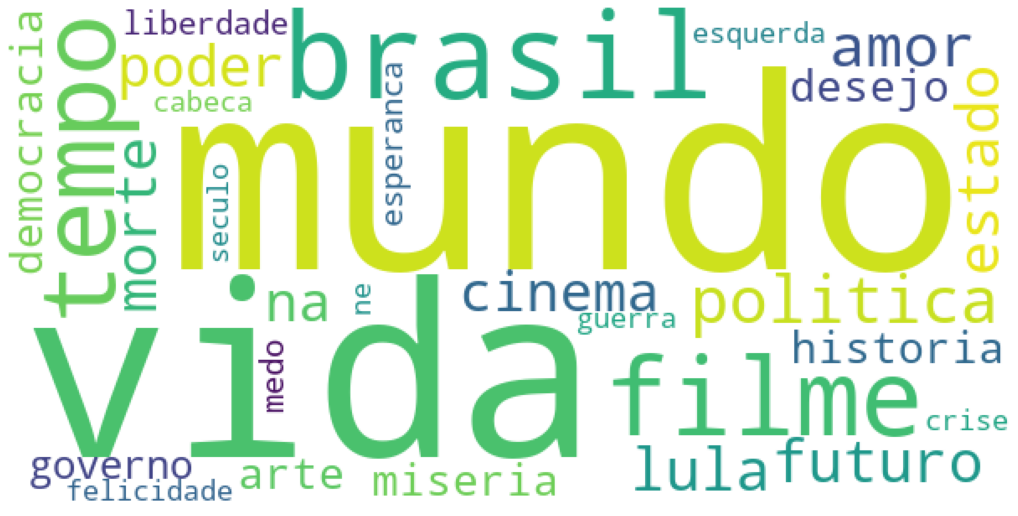

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# from nltk.tokenize import word_tokenize

treated_text = ' '.join(content['normalized'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(treated_text)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (18, 18), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

Extrai o Json normalizado para encaminhar o link separadamente!

In [ ]:
from google.colab import files

content['normalized'].to_json('content_normalized1.json')
files.download('content_normalized1.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Me baseei no exercício do primeiro semestre, onde já associei ao novo link do texto normalizado.

{'{"0":"venho': 1, 'colocar': 6, 'colher': 2, 'sopa': 12, 'bode': 35, 'preto': 64, 'rio': 200, 'virou': 148, 'espero': 11, 'interrompam': 1, 'desastroso': 2, 'populismo': 42, 'sinistro': 29, 'afligem\\\\n': 1, 'labirinto': 33, 'barbaro': 7, 'corrupcao': 182, 'ineficiencia': 4, 'burocratica': 8, 'cidade': 148, 'quebrada': 10, 'violencia': 124, 'assume': 5, 'aspecto': 3, 'cada': 199, 'ousado': 4, 'assimilando': 1, 'tatica': 13, 'terrorismo': 26, 'aprendida': 1, 'tv': 145, 'perceberam': 6, 'invencivel': 23, 'metodo': 27, 'tradicional': 41, 'policia\\\\n': 2, 'barbarie': 30, 'estupidez': 117, 'ganharam': 4, 'contorno': 5, 'original': 19, 'quase': 237, 'cultura': 163, 'separada': 4, 'so': 917, 'gesto': 78, 'corajoso': 13, 'temerario': 1, 'podem': 80, 'ajudar': 11, 'jurisprudencia': 3, 'crime': 183, 'atual': 143, 'pavorosamente': 1, 'conter': 3, 'consequencia': 22, 'tentando': 48, 'reparar': 1, 'causa': 117, 'tratar': 4, 'horror': 151, 'lentidao': 17, 'procedimento': 6, 'comum': 60, 'forma':

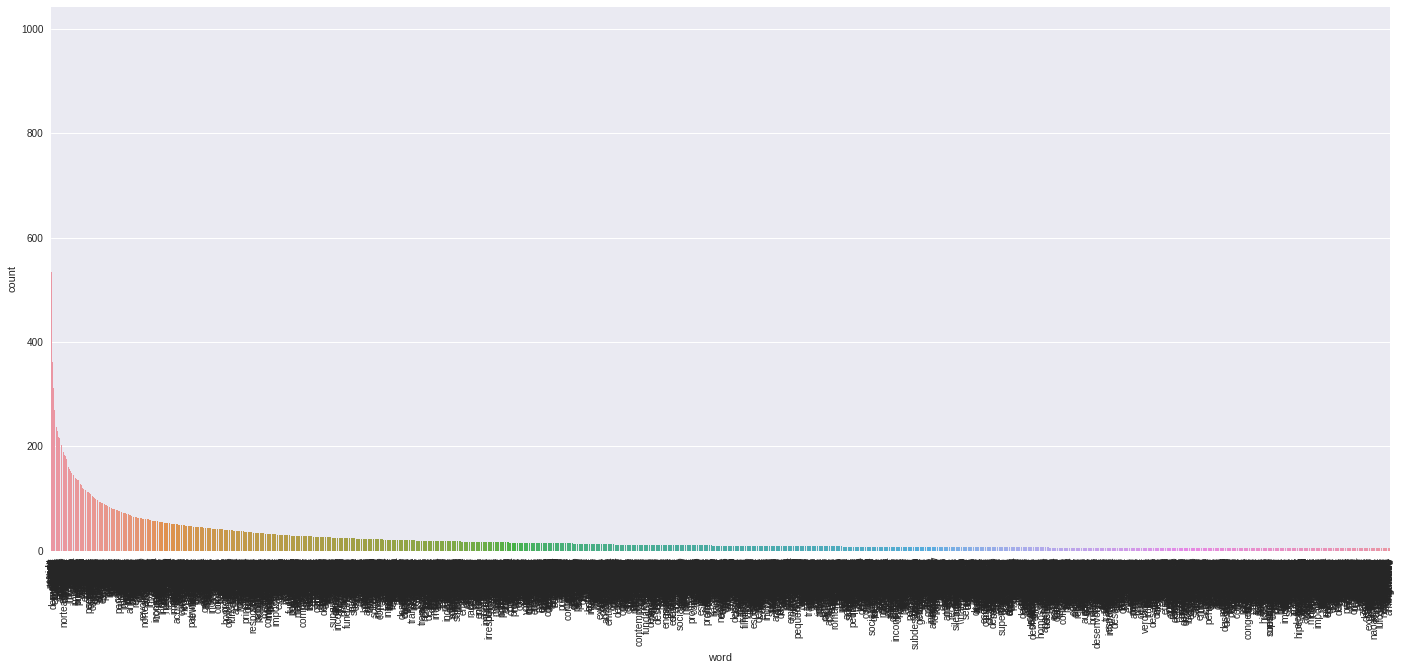

In [ ]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://raw.githubusercontent.com/rafael100495/Aulas_Mackenzie/main/content_normalized1.json'): 
    texto.append(line.decode('utf-8'))

mydict = {}

for line in texto:

  line = line.lower()
  words = line.split()

  for word in words:
    if word not in mydict.keys():
      mydict[word] = 1
    else:
      mydict[word] =  mydict[word] + 1

print(mydict)    




import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4]

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

Infelizmente, o gráfico não ficou nada legal, pois com certeza tem muito mais palavras que devem ser removidas do texto.